# tesing PCA

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# X_train = np.sin(np.linspace(0, 2*np.pi)).reshape(1, -1)
# plt.plot(X_train[0,:])
# X_train.shape

In [36]:
# pca = PCA(n_components=2)
# X_train2 = pca.fit_transform(X_train)
# # X_test = pca.transform(X_test)

In [37]:
# plt.plot(X_train)

In [38]:
# from numpy import *

# '''通过方差的百分比来计算将数据降到多少维是比较合适的，
# 函数传入的参数是特征值和百分比percentage，返回需要降到的维度数num'''
# def eigValPct(eigVals,percentage):
#     #使用numpy中的sort()对特征值按照从小到大排序
#     sortArray=sort(eigVals)
#     #特征值从大到小排序
#     sortArray=sortArray[-1::-1]
#     #数据全部的方差arraySum
#     arraySum=sum(sortArray)
#     tempSum=0
#     num=0
#     for i in sortArray:
#         tempSum+=i
#         num+=i
#         if tempsum>=arraySum*percentage:
#             return num

# '''pca函数有两个参数，其中dataMat是已经转换成矩阵matrix形式的数据集，列表示特征；
# 其中的percentage表示取前多少个特征需要达到的方差占比，默认为0.9'''
# def pca(dataMat,percentage=0.9):
#     #对每一列求平均值，因为协方差的计算中需要减去均值
#     meanVals=mean(dataMat,axis=0)
#     meanRemoved=dataMat-meanVals
#     #cov()计算方差
#     covMat=cov(meanRemoved,rowvar=0)
#     #利用numpy中寻找特征值和特征向量的模块linalg中的eig()方法
#     eigVals,eigVects=linalg.eig(mat(covMat))
#     #要达到方差的百分比percentage，需要前k个向量
#     k=eigValPct(eigVals,percentage)
#     #对特征值eigVals从小到大排序
#     eigValInd=argsort(eigVals)
#     #从排好序的特征值，从后往前取k个，这样就实现了特征值的从大到小排列
#     eigValInd=eigValInd[:-(k+1):-1]
#     #返回排序后特征值对应的特征向量redEigVects（主成分）
#     redEigVects=eigVects[:,eigValInd]
#     #将原始数据投影到主成分上得到新的低维数据lowDDataMat
#     lowDDataMat=meanRemoved*redEigVects
#     #得到重构数据reconMat
#     reconMat=(lowDDataMat*redEigVects.T)+meanVals
#     return lowDDataMat,reconMat

In [61]:
# https://www.jianshu.com/p/044a7783980f
def PCA(dataMat,topNfeat=5):
#topNfeat=5 默认选择前五个最大的特征值
#减去均值 
    meanVals = np.mean(dataMat,axis = 0)
    dataMean = dataMat - meanVals
#求协方差方阵 
    conMat = dataMean.T.dot(dataMean)
    print(conMat.shape)
#求特征值和特征向量
    eigVals,eigVects = np.linalg.eig(conMat)  
#对特征值进行排序  
    eigValInd = np.argsort(eigVals)
    #得到的eigValInd是从小到大的排列，对应的原数据中该元素的索引
    #x = np.array([3, 1, 2])
    #np.argsort(x)
    #array([1, 2, 0])
    #从小到大依次是1,2,3,1对应的索引是1,2对应的索引是2,3对应的索引是0
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    #逆序，从最大到最小的前topNfeat个
#除去不需要的特征向量
    redeigVects=eigVects[:,eigValInd]  
#求新的数据矩阵
    lowdataMat = dataMean.dot(redeigVects)
#求从低维还原回来的数据
    condata = (lowdataMat.dot(redeigVects.T)) + meanVals
#输出降完维德数据加均值
        #因为降维后的数据是一维的了，所以只能加上dataMat整体的平均数进行恢复了
    reducedata=lowdataMat#+meanVals
    return reducedata,condata

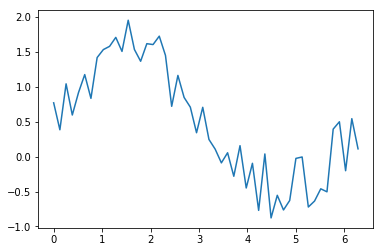

In [62]:
x0 = np.linspace(0, 2*np.pi).reshape(-1,1)
y0 = np.sin(x0)+np.random.random(x0.shape).reshape(-1,1)
plt.plot(x0,y0)

In [63]:
dataMat = np.array(y0).T
dataMat.shape

(1, 50)

In [64]:
_, x0y1 = PCA(dataMat,topNfeat=20)
print(_.shape)
print(x0y1.shape)
x0y1 = x0y1.T

(50, 50)
(1, 20)
(1, 50)


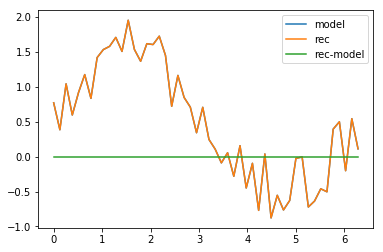

In [65]:
plt.plot(x0,y0,label="model")
plt.plot(x0,x0y1,label="rec")
plt.plot(x0,x0y1-y0,label="rec-model")
plt.legend()

In [87]:
from numpy import *
def pcaFun(dataMat,topNfeat=9999999):
    # 计算每列的平均值axis=0,计算每行的平均值axis=1
    meanVals=mean(dataMat,axis=0);
    # 去平均值,shape(dataMat)=(1000, 2),shape(meanVals)=(1, 2)
    meanRemoved=dataMat-meanVals;# 可以直接对两个维度不同的矩阵进行运算
    # 计算协方差矩阵shape(covMat)=(2, 2)
    covMat=cov(meanRemoved,rowvar=0);
    # 计算协方差矩阵的特征值和特征向量
    eigVals,eigVects=linalg.eig(mat(covMat));
    # 对特征值按升序排序
    eigValInd=argsort(eigVals);
    # 对特征值进行逆序排序
    eigValInd=eigValInd[:-(topNfeat+1):-1];
    # 计算最大特征值对应的特征向量
    redEigVects=eigVects[:,eigValInd];
    # 计算降维之后的数据集
    lowDDataMat=meanRemoved*redEigVects;
    # 重构原始数据
    reconMat=(lowDDataMat*redEigVects.T)+meanVals;
    return lowDDataMat,reconMat;

def plotData(dataMat,reconMat):
    # import matplotlib;
    # import matplotlib.pyplot as plt;
    fig=plt.figure();
    ax=fig.add_subplot(111);
    ax.scatter(dataMat[:,0],dataMat[:,1],marker='^',s=90);
    ax.scatter(reconMat[:,0],reconMat[:,1],marker='o',s=50,c='red');
    plt.show();

In [88]:
x0 = np.linspace(0, 2*np.pi)
y0 = np.sin(x0)+np.random.random(x0.shape)
dataMat = np.array((x0,y0)).T
dataMat.shape

(50, 2)

In [89]:
lowDDataMat,reconMat = pcaFun(dataMat,topNfeat=1)
print(lowDDataMat.shape)
print(reconMat.shape)

(50, 1)
(50, 2)


<function matplotlib.pyplot.legend(*args, **kwargs)>

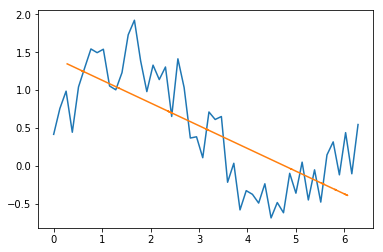

In [90]:
# plotData(dataMat,reconMat)
plt.plot(dataMat[:,0],dataMat[:,1],label="model")
plt.plot(reconMat[:,0],reconMat[:,1],label="rec")
plt.legend

In [91]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
newX = pca.fit_transform(X)
print(X)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]


In [92]:
X.shape

(6, 2)

In [93]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [95]:
pca = PCA(n_components=1)
newX = pca.fit_transform(X)
print(newX.shape)
print(pca.explained_variance_ratio_)

(6, 1)
[0.99244289]


In [96]:
X_rec = pca.inverse_transform(newX)

In [97]:
print(X_rec)

[[-1.15997501 -0.75383654]
 [-1.86304424 -1.21074232]
 [-3.02301925 -1.96457886]
 [ 1.15997501  0.75383654]
 [ 1.86304424  1.21074232]
 [ 3.02301925  1.96457886]]
